
<font size="5">This notebook presents some analysis and results using Football Tracking and Event data provided by Metrica Sports</font>.

Furthermore, I present my own solutions to the challenges proposed by Laurie Shaw in https://www.youtube.com/watch?v=8TrleFklEsE.

As basis, I adapted the base code from https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking. The data was extracted from https://github.com/metrica-sports/sample-data.




In [3]:
import LaurieOnTracking_SourceCode.Metrica_IO as mio
import LaurieOnTracking_SourceCode.Metrica_Viz as mviz
import matplotlib.pyplot as plt
import numpy as np
import math

In [11]:
#Load data

DATADIR = '../tutorial_tracking_event_data/metrica_data/'
game_id = 1

#EVENT DATA

events = mio.read_event_data(DATADIR,game_id)

# Convert positions from metrica units to meters 
events = mio.to_metric_coordinates(events)

home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

print("EVENTS data:")
display(events.head())

#TRACKING DATA

tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

print("TRACKING home team data:")
display(tracking_home.head())

print("TRACKING away team data:")
display(tracking_away.head())

EVENTS data:


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,-5.3,7.48,5.30,4.76
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,5.3,4.76,8.48,19.72
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,5.3,21.08,-5.30,12.92
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,-5.3,12.24,-1.06,2.04


Reading team: home
Reading team: away
TRACKING home team data:


,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-52.91308,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,5.55758,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,-4.79968,7.67788
2,1,0.08,-52.89824,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,5.55758,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,-0.37630,6.35392
3,1,0.12,-52.87916,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,5.55758,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,3.93896,5.06192
4,1,0.16,-52.87174,1.19816,-18.42068,-10.41556,-17.29178,0.68816,-20.19936,9.82328,...,5.55016,4.54716,NaN,NaN,NaN,NaN,NaN,NaN,5.66676,5.28292
5,1,0.20,-52.86326,1.19816,-18.44718,-10.38292,-17.31616,0.66776,-20.19512,9.84096,...,5.51412,4.54852,NaN,NaN,NaN,NaN,NaN,NaN,5.84272,6.41240


TRACKING away team data:


,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_24_x,Away_24_y,Away_26_x,Away_26_y,Away_27_x,Away_27_y,Away_28_x,Away_28_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,42.93954,1.72584,8.89658,19.86008,18.71748,2.23720,18.34860,-18.00368,...,-12.89702,15.37956,NaN,NaN,NaN,NaN,NaN,NaN,-4.79968,7.67788
2,1,0.08,42.92364,1.72584,8.89658,19.86008,18.71748,2.23720,18.34860,-18.00368,...,-12.89702,15.37956,NaN,NaN,NaN,NaN,NaN,NaN,-0.37630,6.35392
3,1,0.12,42.86004,1.72516,8.89658,19.86008,18.71748,2.23720,18.34860,-18.00368,...,-12.89702,15.37956,NaN,NaN,NaN,NaN,NaN,NaN,3.93896,5.06192
4,1,0.16,42.79962,1.72516,8.85206,19.80976,18.69840,2.20184,18.31574,-18.04856,...,-12.97864,15.31836,NaN,NaN,NaN,NaN,NaN,NaN,5.66676,5.28292
5,1,0.20,42.74344,1.72448,8.78846,19.69348,18.65494,2.19708,18.28818,-18.06352,...,-13.07722,15.27076,NaN,NaN,NaN,NaN,NaN,NaN,5.84272,6.41240


In [12]:
#GOALS
shots = events[events['Type']=='SHOT']
goals_df = shots[shots['Subtype'].str.contains('-GOAL')]



**Problem 1: Plot the passes and shot leading up to the second and third goals in the match**

Second Goal:


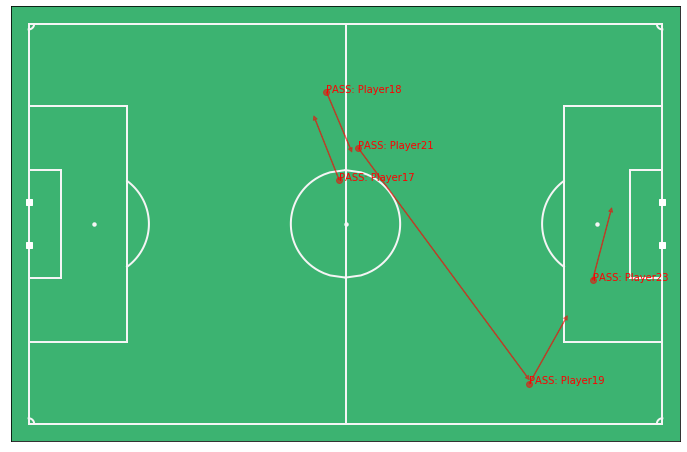

Third Goal:


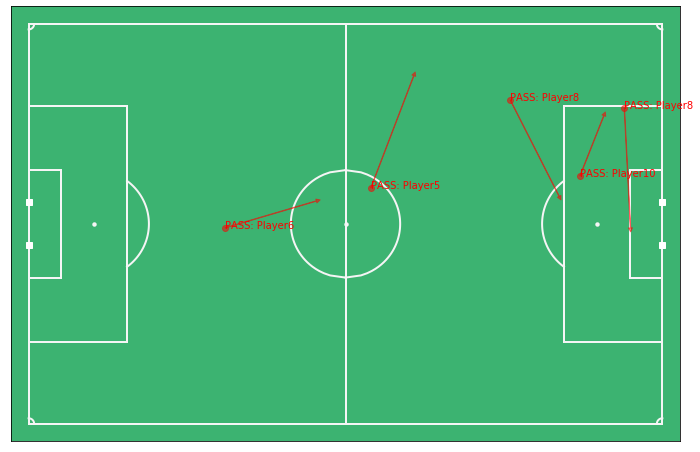

In [5]:

def get_initial_pass(ind):
    
    team_event = events.loc[ind].Team
    counter = 0

    while team_event == events.loc[ind].Team:
        counter += 1
        team_event = events.loc[ind-counter].Team
        
    play = events.iloc[ind-counter:ind]
        
    return play[play['Type'].isin(['PASS', 'SHOT'])]


#SECOND GOAL
print('Second Goal:')
ind = goals_df.iloc[1].name
second_goal = get_initial_pass(ind)

mviz.plot_events( second_goal, indicators = ['Marker','Arrow'], annotate=True )
plt.show()

#THIRD GOAL
print('Third Goal:')
ind = goals_df.iloc[2].name
third_goal = get_initial_pass(ind)

mviz.plot_events( third_goal, indicators = ['Marker','Arrow'], annotate=True )
plt.show()


In [15]:
second_goal[['Start X', 'Start Y', 'End X', 'End Y', 'From', 'Type']].head()

,Start X,Start Y,End X,End Y,From,Type
818,-1.06,7.48,-5.30,18.36,Player17,PASS
819,-3.18,22.44,1.06,12.24,Player18,PASS
820,2.12,12.92,30.74,-26.52,Player21,PASS
821,30.74,-27.20,37.10,-15.64,Player19,PASS
822,41.34,-9.52,44.52,2.72,Player23,PASS


**Problem 2: Plot all the shots from Player 9 of th Home Team. Use a different symbol and transparency (alpha) for shots that result in goals**

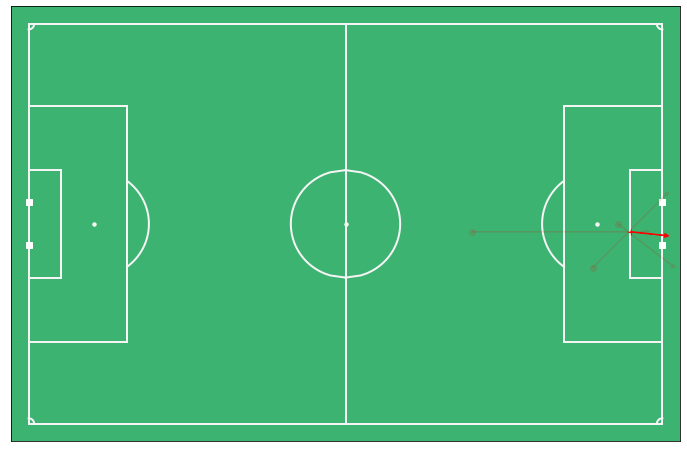

In [5]:
shots_p9 = shots[(shots['Team'] == 'Home') & (shots['From'] == 'Player9')]


markers = ['+' if i == True else 'o' for i in shots_p9['Subtype'].str.contains('-GOAL').values]
alphas = [1.0 if i == True else 0.1 for i in shots_p9['Subtype'].str.contains('-GOAL').values]
    

mviz.my_plot_events( shots_p9, indicators = ['Marker','Arrow'], annotate=False , marker_style = markers, alpha = alphas)
plt.show()

In [19]:
tracking_home.loc[goal_p9_frame]

Period        1.00000
Time [s]     91.56000
Home_11_x   -24.52734
Home_11_y     1.02748
Home_1_x     44.65356
Home_1_y     -5.30536
Home_2_x     45.46552
Home_2_y     -0.91052
Home_3_x     44.46912
Home_3_y     -6.62388
Home_4_x     14.46476
Home_4_y      1.27500
Home_5_x     25.09868
Home_5_y     -2.52348
Home_6_x     30.63718
Home_6_y     25.51292
Home_7_x     28.01050
Home_7_y     14.57036
Home_8_x     42.84944
Home_8_y      0.43996
Home_9_x     44.26878
Home_9_y      2.24060
Home_10_x    40.87148
Home_10_y    25.54148
Home_12_x         NaN
Home_12_y         NaN
Home_13_x         NaN
Home_13_y         NaN
Home_14_x         NaN
Home_14_y         NaN
ball_x       44.22956
ball_y        2.54932
Name: 2289, dtype: float64

**Problem 3: Plot positions of all players at Player 9 goal**

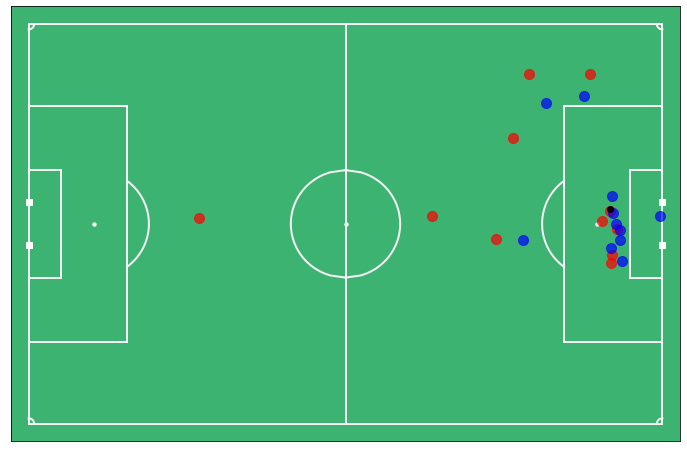

In [13]:
goal_p9_frame = goals_df[goals_df['From'] == 'Player9'].iloc[0]['Start Frame']

fig,ax = mviz.plot_frame( tracking_home.loc[goal_p9_frame], tracking_away.loc[goal_p9_frame] )
plt.show()

**Problem 4: Calculate how far each player ran**

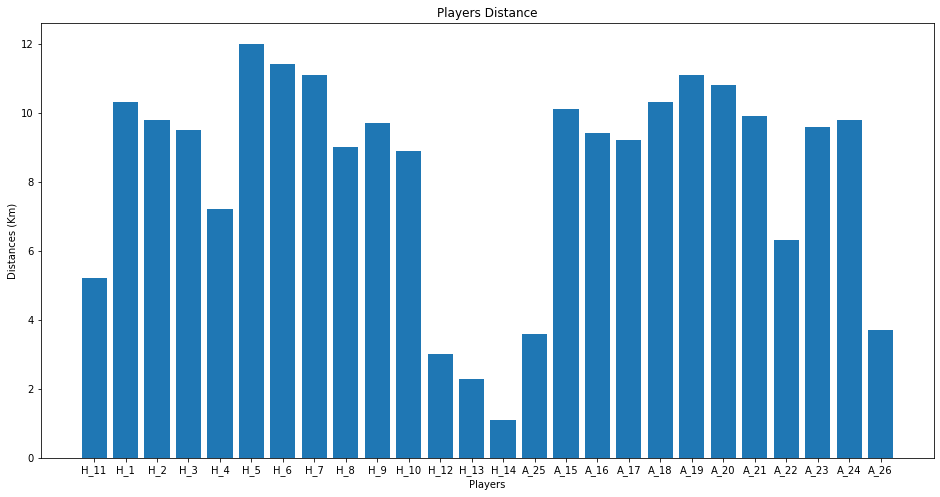

In [7]:

dist_pos = {}
for t, t_text in zip([tracking_home, tracking_away], ['Home', 'Away']):
    
    for i in range(0, len(t.columns[2:-2]), 2):

        feat_x, feat_y = t.columns[2+i], t.columns[2+i+1]
        
        dist = 0
        last_x, last_y = t.iloc[0][feat_x], t.iloc[0][feat_y]

        for ind, row in t.iloc[24::25].iterrows():

            new_x, new_y = row[feat_x], row[feat_y]

            if math.isnan(new_x) or math.isnan(new_y) or math.isnan(last_x) or math.isnan(last_y):
                last_x, last_y = new_x, new_y
                continue

            dist += np.sqrt((new_x - last_x)**2 + (new_y - last_y)**2)

            last_x, last_y = new_x, new_y

        p = feat_x.split('_')[1]
        dist_pos[t_text[0] + '_' + p] = np.round(dist/1000, 1)
        
plt.figure(figsize = (16, 8))
plt.bar(dist_pos.keys(), dist_pos.values())
plt.title('Players Distance')
plt.ylabel('Distances (Km)')
plt.xlabel('Players')
plt.show()